交互展示可能性的探究

idea：
鼠标点击matplotlib生成的图片上的任意一个位置，
matplotlib重新绘图生成图片

In [ ]:
%pylab
import numpy as np
from matplotlib import pyplot as plt
#Some code here [. . .]
fig, ax = plt.subplots(1)
x=[1,2,3,4]
y=[1,2,3,4]
ax.scatter(x,y)
'''preventing plot from rescaling image:'''
# ax.hold(True)
ax.autoscale = False
#ax.plot(100,100, 'ro') # This works
plt.show()

class MouseMonitor:
    flag = True
    x = 0.
    y = 0.
    fig = None
    axes = None
    def __init__(self, fig, ax):
        self.axes = ax
        self.fig = fig
    def __call__(self, event):
    
        if self.flag:
            print('({}, {})'.format(event.xdata, event.ydata))
            self.flag = False
        else:
            d = np.linalg.norm([event.xdata - self.x, event.ydata - self.y])
            print('({}, {})\n\n distance between points: {} m\n\n-------------------\n'.format(event.xdata, event.ydata, d))
            self.flag = True
            self.x = event.xdata
            self.y = event.ydata
            self.axes.plot(self.y, self.x, 'ro', linewidth = 5) #This don't work

mouse = MouseMonitor(fig, ax)
cid = fig.canvas.mpl_connect('button_press_event', mouse)

<IPython.core.display.Javascript object>


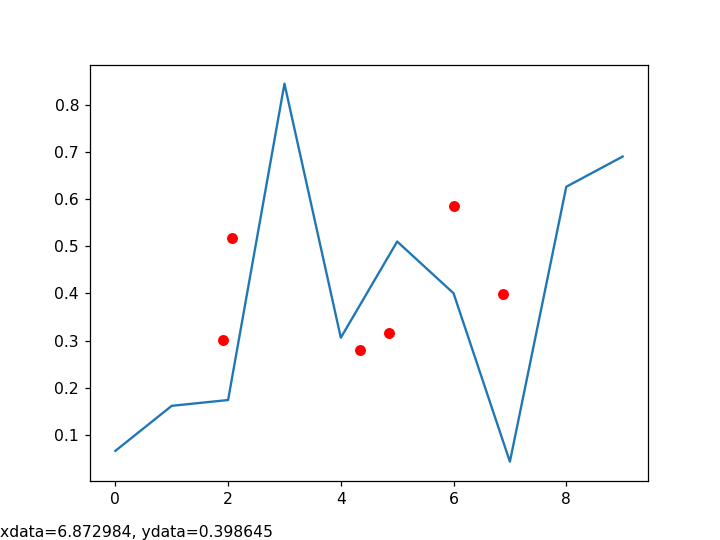

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.random.rand(10))
text=fig.text(0,0,'',va="bottom", ha="left")

def onclick(event):
    ax.plot(event.xdata, event.ydata,'ro', linewidth = 5)
    tx = 'xdata=%f, ydata=%f' % (event.xdata, event.ydata)
    text.set_text(tx)

cid = fig.canvas.mpl_connect('button_press_event', onclick)